# *Project Title:* **Aircraft Risk Assessment for Business Expansion**

## **Author:** Patrice Okoiti

## **Business Problem**
Our company is diversifying their portfolio by venturing into the aviation industry. The aim is to purchase and operate aircraft for commercial and private enterprises. However, aviation involves significant safety risks, including accidents and operational hazards. The goal of this project is to analyze historical aircraft accident data to identify low-risk aircraft models and key risk factors that could impact operations.

## **Objectives**
1.Identify the type of aircract with lowest accidents rate

2.Identify risk factors contributing to aircraft accidents

3.Evaluate flight risks based on operations

## **Data Understanding**
The selected Dataset for our analysis is AviationData.csv from the National Transportation Safety board deatailing the civil aviation accidents and selected incidents in the United States and international waters between 1962 and 2023. It details aircraft accidents, including information on accident, aircraft specifications, weather conditions, and injury severity which are relevant to our analysis.

### **column description**
| **Columns** | **Description** |
|-------------|-----------------|
| Event Id, Accident Number, Event Date, Location, Country, Latitude, Longitude, Airport Code, Airport Name | Unique identifiers for each accident and its location. |
| Make, Model, Aircraft Category, Amateur Built, Number of Engines, Engine Type | Details about the aircraft involved in the accident. |
| Injury Severity, Aircraft Damage, Weather Condition, Broad Phase of Flight | Risk factors contributing to the accident. |
| FAR Description, Schedule, Purpose of Flight, Air Carrier | Type of operations and flight purpose. |
| Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured | Casualties per accident. |


In [236]:
# First step is to import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Mining

This involves reading and loading our data on to our notebook based on the file format

In [237]:
# Next step is data loading
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory=False)
# Display the fisrt 5 rows of the dataframe
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Data Preparation

This involved inspecting our dataset to identify the shape, name of columns, datatype of each column and any columns with missing values

In [238]:
# Inspect the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

From the above information, we can deduce that our dataframe has a shape of 88889 rows and 31 columns. 
The dataframe has 5 numerical columns and 26 categorical column. All the 5 numerical columns have float datatype.
Of the 31 columns only the first 4 have complete entries, meaning 27 columns have missing values

In [239]:
# Get summary statistics of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The above information is a statistical summary of the numeraical column of the dataframe

## Data Preparation

This step involved validation of the dataset. This involved identifying and handling missing values and duplicates so as to get a clean dataset

In [240]:
# First Step is to create a copy of the original dataset
df_clean = df.copy() # Henceforth we will use the copy to clean our dataset

# Identify duplicates from the created copy of dataset
df_clean.duplicated().value_counts()

False    88889
dtype: int64

From the above output we can deduce that our dataset does not contain any duplicates

In [241]:
# Next we display a breakdown of missing values in our dataset
df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [242]:
# Next we replace our missing values by creating a for loop that iterates through our dataset columns and fill the missing values with the set values based on the datatype 
for col in df_clean.columns:
    if str(df_clean[col].dtype) == 'object':
        df_clean[col].fillna('Unknown', inplace=True)
    else:
        df_clean[col].fillna(0, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Latitude                88889 non-null  object 
 7   Longitude               88889 non-null  object 
 8   Airport.Code            88889 non-null  object 
 9   Airport.Name            88889 non-null  object 
 10  Injury.Severity         88889 non-null  object 
 11  Aircraft.damage         88889 non-null  object 
 12  Aircraft.Category       88889 non-null  object 
 13  Registration.Number     88889 non-null  object 
 14  Make                    88889 non-null

Overall, filling of missing values helps avoid unexpected arrors and completeness of the dataset for analysis.Filling of the missing values in Categorical column with placeholder 'Unknown' and numeriacl column with zero allows me to maintain consistency of dataset without dropping valuable records, hence avoiding bias.

In [249]:
# Convert our date column to datetime
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])

# display the first 5 rows
df_clean['Event.Date'].head()


0   1948-10-24
1   1962-07-19
2   1974-08-30
3   1977-06-19
4   1979-08-02
Name: Event.Date, dtype: datetime64[ns]

In [244]:
df_clean['Purpose.of.flight'].unique()

array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [245]:
# filter out private and commercial aircraft
private = ["Personal", "Executive/corporate", "Business", "Ferry"]
commercial = ["Aerial Application", "Aerial Observation", "Air Carrier", "Public Aircraft"]

# Create an empty list
flight_purpose = []

for purpose in df_clean['Purpose.of.flight']:
    if purpose in private:
        flight_purpose.append('Private')
    elif purpose in commercial:
        flight_purpose.append('Commercial')
    else:
        flight_purpose.append('Other')

# Create a new   column by assigning it to the empty list created above
df_clean['Category of Purpose'] = flight_purpose

df_clean_sort = df_clean.loc[(df_clean['Category of Purpose'] == 'Private') | (df_clean['Category of Purpose'] == 'Commercial')]
# reassign the dataframe to sliced dataframe
df_clean_sort = df_clean_sort.copy()
df_clean_sort.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Category of Purpose
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,Unknown,Private
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,Private
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,Unknown,Unknown,...,Unknown,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,Private
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,Private
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Unknown,Unknown,...,Unknown,1.0,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,Private


In [246]:
# Next we save our cleaned data which will be useful during creation Dashboard
df_clean_sort.to_csv('CleanAviationData.csv')

## Data Evaluation

Our first objective is to identify aircraft type with the highest accident rates. This will involve analyzing the number of accidents and severity of injury based on aircraft Make and Model to determine which aircraft have the lowest risk.



In [251]:
# Edit the names of the makes for consistency
df_clean_sort['Make'] = df_clean_sort['Make'].str.title()
df_clean_sort['Make'].value_counts().idxmin()


'Mckinley Eaa'

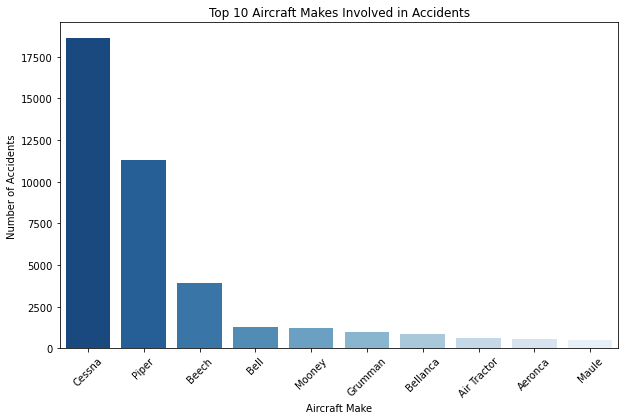

In [248]:
aircraft_counts = df_clean_sort['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=aircraft_counts.index, y=aircraft_counts.values, palette='Blues_r')
plt.xticks(rotation=45)
plt.title("Top 10 Aircraft Makes Involved in Accidents")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.show()